**Import Libraries**

*Note:*
*Scikit-learn is a Python library for machine learning that offers simple tools for data analysis and modeling.*

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Input

# 1.Dataset Selection
The dataset named Video Game Sales with Ratings contains a collection of more than 16000 data which lists video games with sales above 100,000 copy.Data collection is done by web scraping technique.

In [2]:
#Read the dataset
videogame_df=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")


Displying the dataset
by displaying the names of the columns the columns which can be used for the fearture analysis can be easy to identify.


In [3]:
videogame_df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# 2.EDA


**Part1.a**

In this part we will address missing values in our data set this will help determain which column emputate and which we can clean using the statistcal methods


In [4]:
 #calculate the total of null and empty values in each column
nasales_null_count=videogame_df["NA_Sales"].isna().sum()+videogame_df["NA_Sales"].eq('').sum()

eusales_null_count=videogame_df["EU_Sales"].isna().sum()+videogame_df["EU_Sales"].eq('').sum()

jpsales_null_count=videogame_df["JP_Sales"].isna().sum()+videogame_df["JP_Sales"].eq('').sum()

othersales_null_count=videogame_df["Other_Sales"].isna().sum()+videogame_df["Other_Sales"].eq('').sum()

globalsales_null_count=videogame_df["Global_Sales"].isna().sum()+videogame_df["Global_Sales"].eq('').sum()

criscore_null_count=videogame_df["Critic_Score"].isna().sum()+videogame_df["Critic_Score"].eq('').sum()

criticcount_null_count=videogame_df["Critic_Count"].isna().sum()+videogame_df["Critic_Count"].eq('').sum()

us_null_count=videogame_df["User_Score"].isna().sum()+videogame_df["User_Score"].eq('').sum()

uc_null_count=videogame_df["User_Count"].isna().sum()+videogame_df["User_Count"].eq('').sum()
developer_null_count=videogame_df["Developer"].isna().sum()+videogame_df["Developer"].eq('').sum()

rating_null_count=videogame_df["Rating"].isna().sum()+videogame_df["Rating"].eq('').sum()

**part1.b**

Displaying the persentge of null in each recore the recored

In [5]:
print("total na sales  null value",nasales_null_count)
print("persentge of the missing values na sales ",nasales_null_count/len(videogame_df))

print("total EU_Sales e null value",eusales_null_count)
print("persentge of the missing values EU_Sales ",eusales_null_count/len(videogame_df))

print("total JP_Sales  null value",jpsales_null_count)
print("persentge of the missing values JP_Sales",jpsales_null_count/len(videogame_df))

print("total Other_Sales  null value",othersales_null_count)
print("persentge of the missing values Other_Sales ",othersales_null_count/len(videogame_df))

print("total Global_Sales null value",globalsales_null_count)
print("persentge of the missing values Global_Sales ",globalsales_null_count/len(videogame_df))

print("total critic score null value",criscore_null_count)
print("persentge of the missing values critic score ",criscore_null_count/len(videogame_df))

print("total Critic_Count null value",criticcount_null_count)
print("persentge of the missing values Critic_Count ",criticcount_null_count/len(videogame_df))

print("total User_Score null value",us_null_count)
print("persentge of the missing values User_Score ",us_null_count/len(videogame_df))

print("total User_Count null value",uc_null_count)
print("persentge of the missing values User_Count ",uc_null_count/len(videogame_df))

total na sales  null value 0
persentge of the missing values na sales  0.0
total EU_Sales e null value 0
persentge of the missing values EU_Sales  0.0
total JP_Sales  null value 0
persentge of the missing values JP_Sales 0.0
total Other_Sales  null value 0
persentge of the missing values Other_Sales  0.0
total Global_Sales null value 0
persentge of the missing values Global_Sales  0.0
total critic score null value 8582
persentge of the missing values critic score  0.5133082122136492
total Critic_Count null value 8582
persentge of the missing values Critic_Count  0.5133082122136492
total User_Score null value 9129
persentge of the missing values User_Score  0.5460254799928226
total User_Count null value 9129
persentge of the missing values User_Count  0.5460254799928226


the follwing 4 columns have over 50% null or emprty values the stander is to drop them .

In [6]:
columnnames=["Critic_Count","User_Count","Critic_Score","User_Score"]
videogame_df=videogame_df.drop(columns=columnnames)

**Visualization part**

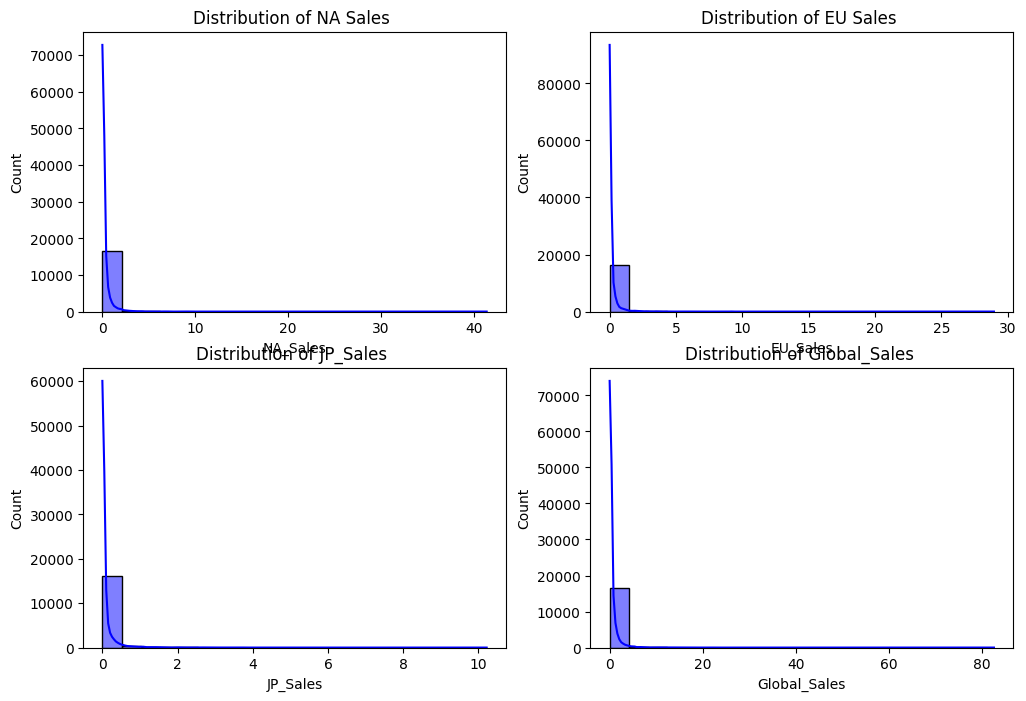

In [7]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(data=videogame_df,x='NA_Sales',kde=True ,bins=20 ,color='blue')
plt.title("Distribution of NA Sales ")


plt.subplot(2,2,2)
sns.histplot(data=videogame_df,x='EU_Sales',kde=True ,bins=20 ,color='blue')
plt.title("Distribution of EU Sales ")

plt.subplot(2,2,3)
sns.histplot(data=videogame_df,x='JP_Sales',kde=True ,bins=20 ,color='blue')
plt.title("Distribution of JP_Sales ")

plt.subplot(2,2,4)
sns.histplot(data=videogame_df,x='Global_Sales',kde=True ,bins=20 ,color='blue')
plt.title("Distribution of Global_Sales ")

plt.show()

More in data exploration

In [8]:
print(videogame_df["Developer"].describe())
print(videogame_df["Rating"].describe())

print(videogame_df["Developer"].isna().sum())
print(videogame_df["Rating"].isna().sum())

count       10096
unique       1696
top       Ubisoft
freq          204
Name: Developer, dtype: object
count     9950
unique       8
top          E
freq      3991
Name: Rating, dtype: object
6623
6769


# 3.Data Cleaning and Processing







Data Imputation: Filling Missing Values for Developer and Rating

In [9]:
developer_mod=videogame_df["Developer"].mode()
videogame_df["Developer"].fillna(developer_mod[0],inplace=True)

rating_mod=videogame_df["Rating"].mode()
videogame_df["Rating"].fillna(rating_mod[0],inplace=True)

**Clean and Select Sales and Rating Data**

In [10]:
cleaned_df=videogame_df
#replace the letters with num
rating_mapping={"E": 4 ,"T": 3, "M":2,"":0}
cleaned_df["Rating"]=cleaned_df["Rating"].map(rating_mapping)

sales_columns=['NA_Sales','EU_Sales','JP_Sales','Global_Sales']
attribut=sales_columns+["Rating"]


sales_rating_df=cleaned_df[attribut]
print(sales_rating_df)

       NA_Sales  EU_Sales  JP_Sales  Global_Sales  Rating
0         41.36     28.96      3.77         82.53     4.0
1         29.08      3.58      6.81         40.24     4.0
2         15.68     12.76      3.79         35.52     4.0
3         15.61     10.93      3.28         32.77     4.0
4         11.27      8.89     10.22         31.37     4.0
...         ...       ...       ...           ...     ...
16714      0.00      0.00      0.01          0.01     4.0
16715      0.00      0.01      0.00          0.01     4.0
16716      0.00      0.00      0.01          0.01     4.0
16717      0.01      0.00      0.00          0.01     4.0
16718      0.00      0.00      0.01          0.01     4.0

[16719 rows x 5 columns]


**Investigate correlations**

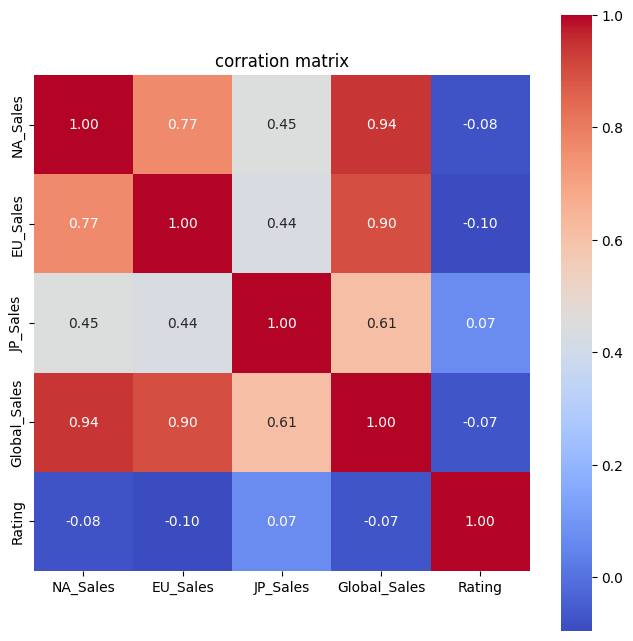

In [11]:
srating_corr_matix=sales_rating_df.corr()
plt.figure(figsize=(8,8))

sns.heatmap(srating_corr_matix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title("corration matrix")
plt.show()

## Stratified Sampling for Class Balance

- **Features & Target**: Define features and target variable.
- **Class Counts**: Count samples per class.
- **Remove Single-Class**: Exclude classes with one sample.
- **Split & Stratify**: Divide data into train/test sets, maintaining class balance.

### Benefits:
- **Balanced Classes**: Mitigates class imbalance issues.
- **Generalization**: Enhances model generalization.
- **Prevents Overfitting**: Reduces risk of overfitting to rare classes.


In [12]:
# Define features and target variable
features = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
target = 'Global_Sales'
df=cleaned_df
# Count the number of samples per class
class_counts = cleaned_df[target].value_counts()

# Find classes with only one sample
single_class_indices = class_counts[class_counts == 1].index

# Remove samples from classes with only one sample
df_filtered = cleaned_df[~cleaned_df[target].isin(single_class_indices)]

# Split dataset into features and target variable
X = df_filtered[features]
y = df_filtered[target]

# Perform stratified sampling to achieve balanced class distributions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



# ML Models


## Feature Engineering